In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

np.random.seed(0)

In [4]:
from ranker import BFSScraper, CustomStemmer, BubbleChart, Ranker, User # Code written by us it is documented in file ranker.py

### Downloading documents from Wikipedia
Starting from the `Jazz` page

In [5]:
bfs_scrap = BFSScraper(n_to_visit=10)
bfs_scrap.bfs('https://en.wikipedia.org/wiki/Jazz', 1500)

1500 sites already collected: : 1907it [55:57,  1.76s/it]


In [6]:
bfs_scrap.generate_summary() # Generate summary that shows how wikipedia was traversed by scraper

In [7]:
bfs_scrap.generate_csv() # Generate csv with scraped data

### Preprocessing data

In [5]:
texts = pd.read_csv('text.csv', index_col=0).T
texts.head()

,content,num_of_links,selected_links
https://en.wikipedia.org/wiki/Jazz,\nJazz is a music genre that originated in the...,863,['https://en.wikipedia.org/wiki/Kansas_City_ja...
https://en.wikipedia.org/wiki/Kansas_City_jazz,Kansas City jazz is a style of jazz that devel...,236,"['https://en.wikipedia.org/wiki/Ragtime', 'htt..."
https://en.wikipedia.org/wiki/Gary_Burton,"\nGary Burton (born January 23, 1943)[1] is an...",133,['https://en.wikipedia.org/wiki/Stephane_Grapp...
https://en.wikipedia.org/wiki/October_Revolution_in_Jazz,The October Revolution in Jazz was a four-day ...,45,"['https://en.wikipedia.org/wiki/Bill_Dixon', '..."
https://en.wikipedia.org/wiki/Minstrel_show,"\nThe minstrel show, also called minstrelsy, w...",254,"['https://en.wikipedia.org/wiki/Tall_tale', 'h..."


In [6]:
stemmer = CustomStemmer()
preprocessed = stemmer.process_corpus(texts)

In [7]:
stemmer.generate_csv(preprocessed)

All files available [here](https://drive.google.com/drive/folders/1FkuFF7tCvBj8pTVDtOtFXtfSUOH7a2vw?usp=sharing), as git doesn't support so large files 

## Visualization of data

Violing showing distribution of number of links on wikipedia pages. We can clearly see that most pages have rather small amount of links, but some have enourmous.

We've additionally plotted all points so that you can hover on it and see which page has how many links.

In [8]:
texts_reset_id = texts.reset_index().astype({"num_of_links": "int32"})
px.violin(texts_reset_id, 
          x="num_of_links", 
          title="Distribution of number of links on wikiedia starting traversal from Jazz",
          labels= {"num_of_links": "Number of links on a page"},
          points='all',
          hover_data=["index"])

In [9]:
data = pd.read_csv('processed.csv', index_col=0)
data.head()

,text
https://en.wikipedia.org/wiki/Jazz,Jazz music genre originated communities New Or...
https://en.wikipedia.org/wiki/Kansas_City_jazz,Kansas City jazz style jazz developed Kansas C...
https://en.wikipedia.org/wiki/Gary_Burton,Gary Burton born January American jazz vibraph...
https://en.wikipedia.org/wiki/October_Revolution_in_Jazz,October Revolution Jazz festival new jazz musi...
https://en.wikipedia.org/wiki/Minstrel_show,minstrel show also called minstrelsy American ...


In [10]:
words = [text.split() for text in data['text']]
words = [
    word for document in words for word in document]


Top 10 most occured words

In [11]:
from collections import Counter

counter = Counter(words)
cols = [x[0].lower() for x in counter.most_common(10)]
for pair in counter.most_common(10):
    print(f'{pair[0]}: {pair[1]}')

music: 12903
also: 8741
first: 7072
jazz: 6359
one: 5856
New: 5731
album: 5208
band: 4558
American: 4276
time: 4065


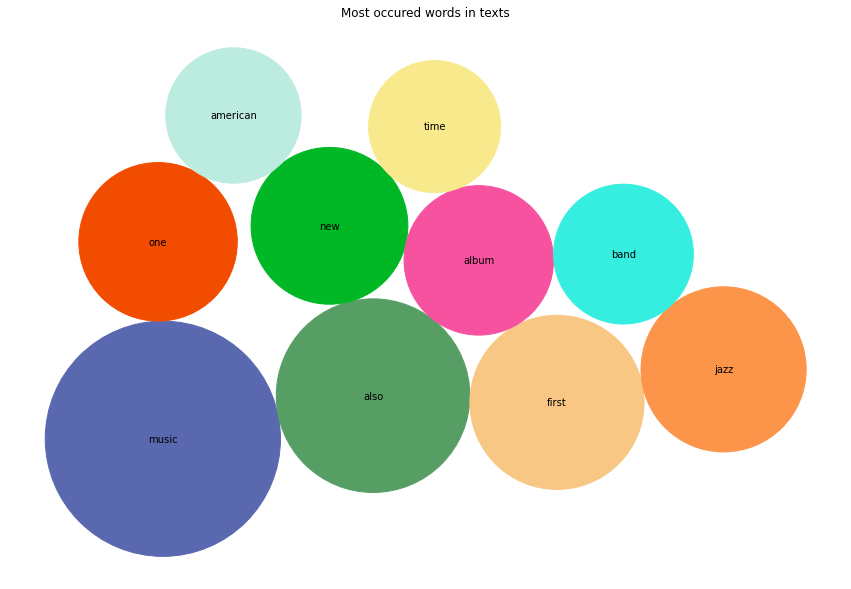

In [12]:
bubble_chart = BubbleChart(area=[x[1] for x in counter.most_common(10)],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(15, 15))
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825',
          '#F652A0', '#36EEE0', '#BCECE0', '#F8EA8C']
bubble_chart.plot(
    ax, cols, colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Most occured words in texts')
ax.set
plt.rcParams.update({'font.size': 10})
plt.show()

Co-occurances

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer()
CountData = CountVec.fit_transform(data['text'])
 
wordsM = (CountData.T)@CountData

In [17]:
df = pd.DataFrame(wordsM.toarray(),
                  columns=CountVec.get_feature_names_out(), index=CountVec.get_feature_names_out())
df.head()

MemoryError: Unable to allocate 44.1 GiB for an array with shape (76933, 76933) and data type int64

Biggest number of co-occurance

In [31]:
a = wordsM.copy()
for i in range(a.shape[0]):
    a[i,i] = -1
x, y = np.unravel_index(a.argmax(), a.shape)
print(f'The most co-occurances are: {CountVec.get_feature_names_out()[x]}, {CountVec.get_feature_names_out()[y]} with a value of {a[x,y]}')


In [ ]:
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import nxviz as nv
from nxviz import annotate


c:\Users\karol\AppData\Local\Programs\Python\Python39\lib\site-packages\nxviz\__init__.py:18: UserWarning:


nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)




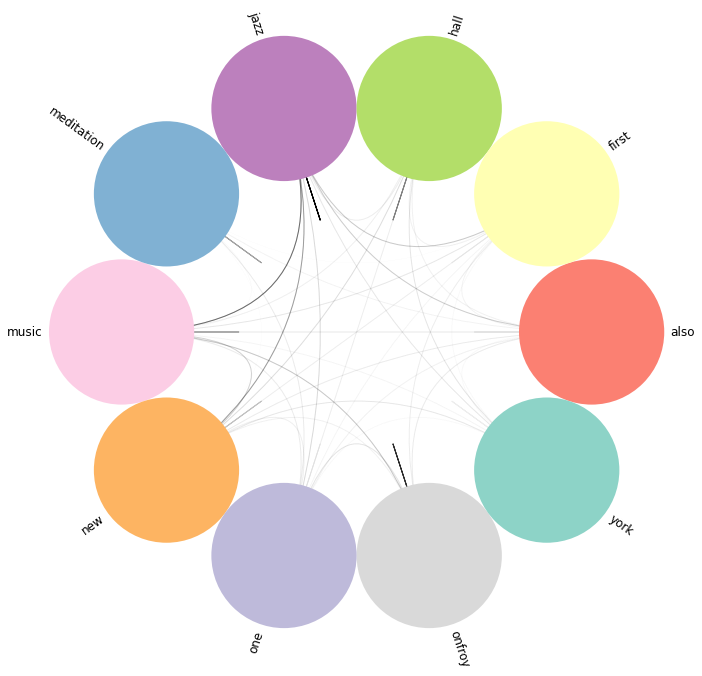

In [ ]:
top = df[cols].loc[cols]
G = nx.from_numpy_array(top.values)
mapping = {x: cols[x] for x in range(len(cols))}
G = nx.relabel_nodes(G, mapping)

for v, name in zip(G, cols):
    G.nodes[v]["class"] = G.degree(v, weight="weight")
    G.nodes[v]["name"] = name

ax = nv.circos(
    G,
    node_color_by="class",
    edge_alpha_by="weight",
    group_by="name",
)

ax.figure.tight_layout()
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 12})
annotate.circos_labels(G, group_by="name", layout="rotate")


Heaps' and Zipf's laws

In [13]:
best_k, best_b, best_error = 60, 0.5, 9999999999
exact = len(set(words))
T = len(words)
for k, b in zip(range(30, 101), np.arange(0.4, 0.61, 0.05)):
    M = k * (T ** b)
    if abs(M-exact) < best_error:
        best_k = k
        best_b = b
        best_error = abs(M-exact)

print(f'The best possible heaps\' law approximation give us parameters k={best_k}, and b={best_b} with an absolute error of {np.round(best_error, 3)} which is just {np.round(best_error/exact,3)}% of final answer')
print(f'Heaps\': {np.round(best_k * (T ** best_b), 3)}, exact answer: {exact}')


The best possible heaps' law approximation give us parameters k=33, and b=0.55 with an absolute error of 754.174 which is just 0.008% of final answer
Heaps': 91479.174, exact answer: 90725


In [14]:
best = counter.most_common(5)
top_word, top_count = best[1]
print(f'The most popular term is {top_word} with {top_count} occurances')
for i, element in enumerate(best):
    word, count = element
    print(
        f'The word \"{word}\" has {count} occurances, while we approximated {top_count/(i+1)}')


The most popular term is also with 8741 occurances
The word "music" has 12903 occurances, while we approximated 8741.0
The word "also" has 8741 occurances, while we approximated 4370.5
The word "first" has 7072 occurances, while we approximated 2913.6666666666665
The word "jazz" has 6359 occurances, while we approximated 2185.25
The word "one" has 5856 occurances, while we approximated 1748.2


## Rank

In [15]:
ranker = Ranker('processed.csv', pca_components=1500)

In [16]:
sebastian = User()

In [17]:
ranker.rank_based_on_link(sebastian, "https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies", model="tfidf")

https://en.wikipedia.org/wiki/Thelonious_Monk_Institute_of_Jazz, score: 0.3650970854472859
https://en.wikipedia.org/wiki/Jazz, score: 0.26060872578340244
https://en.wikipedia.org/wiki/British_jazz, score: 0.22491173210201687
https://en.wikipedia.org/wiki/Jazz_band, score: 0.20682110027237655
https://en.wikipedia.org/wiki/Australian_jazz, score: 0.20428603016876257
https://en.wikipedia.org/wiki/Jazz_Age, score: 0.19361154802618552
https://en.wikipedia.org/wiki/Belgian_jazz, score: 0.19209965722265332
https://en.wikipedia.org/wiki/Duke_University_Press, score: 0.1872810136184494
https://en.wikipedia.org/wiki/Scott_Yanow, score: 0.18576939017988015
https://en.wikipedia.org/wiki/Free_jazz, score: 0.18247168850319873


In [18]:
ranker.rank_based_on_link(
    sebastian, "https://en.wikipedia.org/wiki/Australian_jazz", model="pca")


https://en.wikipedia.org/wiki/Rock_music_in_Australia, score: 0.4159405781407163
https://en.wikipedia.org/wiki/Jazz, score: 0.3633826633299151
https://en.wikipedia.org/wiki/British_jazz, score: 0.3069501881625458
https://en.wikipedia.org/wiki/Graeme_Bell, score: 0.28468850452319805
https://en.wikipedia.org/wiki/Jazz_band, score: 0.279285705768752
https://en.wikipedia.org/wiki/Belgian_jazz, score: 0.2707843382737323
https://en.wikipedia.org/wiki/George_Golla, score: 0.2489738337370737
https://en.wikipedia.org/wiki/Jazz_Age, score: 0.245134391964814
https://en.wikipedia.org/wiki/Jazz_fusion, score: 0.24022516314150277
https://en.wikipedia.org/wiki/Fusion_jazz, score: 0.24022516314150277


In [19]:
sebastian.viewed_links

{'https://en.wikipedia.org/wiki/Australian_jazz',
 'https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies'}

In [20]:
ranker.recommend_based_on_history(sebastian, model="svd")

https://en.wikipedia.org/wiki/Rock_music_in_Australia, score: 0.3841
https://en.wikipedia.org/wiki/George_Golla, score: 0.3728
https://en.wikipedia.org/wiki/Thelonious_Monk_Institute_of_Jazz, score: 0.2682
https://en.wikipedia.org/wiki/The_Sydney_Morning_Herald, score: 0.2652
https://en.wikipedia.org/wiki/Graeme_Bell, score: 0.2072
https://en.wikipedia.org/wiki/MGH_Institute_of_Health_Professions, score: 0.1812
https://en.wikipedia.org/wiki/WBGO, score: 0.1585
https://en.wikipedia.org/wiki/Emory_Elliott, score: 0.1342
https://en.wikipedia.org/wiki/International_Jazz_Day, score: 0.1342
https://en.wikipedia.org/wiki/Betty_Carter, score: 0.1303


In [21]:
ranker.explain_similarity("https://en.wikipedia.org/wiki/MGH_Institute_of_Health_Professions","https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies")

0.15984874494013568
